<style>
    .section {
        background-color: #f7f7f7;
        border-radius: 8px;
        padding: 20px;
        box-shadow: 0px 2px 5px rgba(0, 0, 0, 0.1);
        margin-bottom: 20px;
        max-width: 1050px;
    }

    h1 {
        color: #0077b5;
        font-size: 32px;
        text-align: center;
        margin-bottom: 20px;
    }

    h2 {
        color: #0077b5;
        font-size: 24px;
        margin-bottom: 10px;
    }

    p {
        font-size: 18px;
        line-height: 1.6;
        margin-bottom: 10px;
    }

    ul {
        list-style-type: none;
        padding-left: 0;
        font-size: 18px;
        line-height: 1.6;
    }

    li {
        margin-bottom: 5px;
    }

    .bullet {
        display: inline-block;
        width: 10px;
        height: 10px;
        border-radius: 50%;
        background-color: #0077b5;
        margin-right: 8px;
    }

    .linkedin-link {
        text-align: center;
        margin-top: 20px;
    }

    .linkedin-button {
        display: inline-block;
        background-color: #0077b5;
        color: #fff;
        padding: 15px 30px;
        border-radius: 40px;
        font-size: 18px;
        font-weight: bold;
        cursor: pointer;
        text-decoration: none;
        transition: background-color 0.3s ease;
    }

    .linkedin-button:hover {
        background-color: #005F96;
    }
</style>

<div class="section">
    <h1>K-Nearest Neighbors (K-NN)</h1>
    <p>
        K-Nearest Neighbors (K-NN) is a powerful machine learning algorithm used for classification and regression tasks. It's non-parametric and lazy, making minimal assumptions about the underlying data distribution during training.
    </p>
</div>

<div class="section">
    <h2>Why use K-Nearest Neighbors?</h2>
    <ul>
        <li><span class="bullet"></span>Easy to understand and implement.</li>
        <li><span class="bullet"></span>Does not require extensive training.</li>
        <li><span class="bullet"></span>Versatile for both classification and regression tasks.</li>
        <li><span class="bullet"></span>Adapts well to different types of data and effective in various domains.</li>
    </ul>
</div>

<div class="section">
    <h2>Applications of K-NN</h2>
    <p>
        K-NN finds its applications in recommendation systems, anomaly detection, and even in search algorithms.
    </p>
</div>

<div style="text-align: center; margin-top: 20px;">
    <a href="https://www.linkedin.com/in/sohaib-awan-042b68244" target="_blank">
        <button style="background-color: #0077b5; color: #fff; padding: 15px 30px; border-radius: 40px; font-size: 18px; font-weight: bold; cursor: pointer;">LinkedIn</button>
    </a>
</div>


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sb
plt.style.use('ggplot')

In [2]:
df = pd.read_csv("D:\\PROGRAMMING\\DATASETS\\User_Data.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
X = df.iloc[:, [2, 3]].values
y = df.iloc[:, 4].values
# y = df[['Purchased']]

In [4]:
## Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [1]:
## Example
'''
y_test = [1, 0, 0, 1, 1, 0, 0, 1, 0, 1]
pred_i = [1, 0, 1, 1, 0, 1, 0, 1, 1, 1]
pred_i != y_test
[False, False, True, False, True, True, False, False, True, False]
np.mean(pred_i != y_test)
(0 + 0 + 1 + 0 + 1 + 1 + 0 + 0 + 1 + 0) / 10 = 0.3

So, the error rate is 0.3
means the classifier makes 30% incorrect predictions
'''

'\ny_test = [1, 0, 0, 1, 1, 0, 0, 1, 0, 1]\npred_i = [1, 0, 1, 1, 0, 1, 0, 1, 1, 1]\npred_i != y_test\n\n'

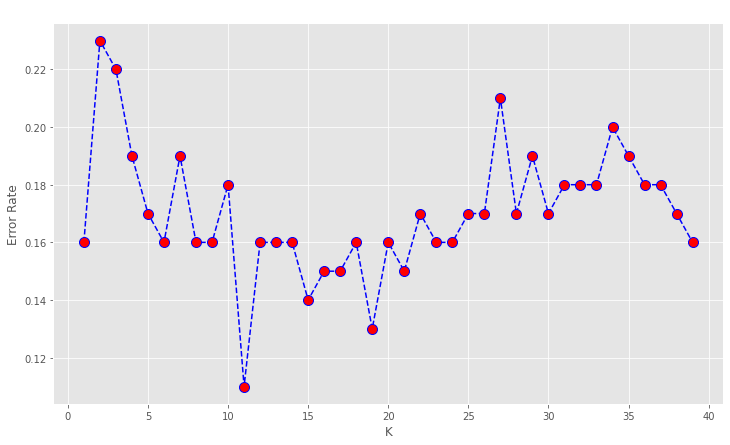

Minimum error rate: 0.11  at k is = 11


In [5]:
error_rate = []
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))  # Extract the values from y_test

plt.figure(figsize=(12, 7))
plt.plot(range(1, 40), error_rate, color="blue", linestyle="dashed",
         marker='o', markerfacecolor="red", markersize=10)
plt.title("Error Rate vs. K Values")
plt.xlabel("K")
plt.ylabel("Error Rate")
plt.show()

min_error_rate = min(error_rate)
min_k = error_rate.index(min_error_rate) + 1  # Add 1 because indexing starts from 0
print("Minimum error rate:", min_error_rate, " at k is =", min_k)


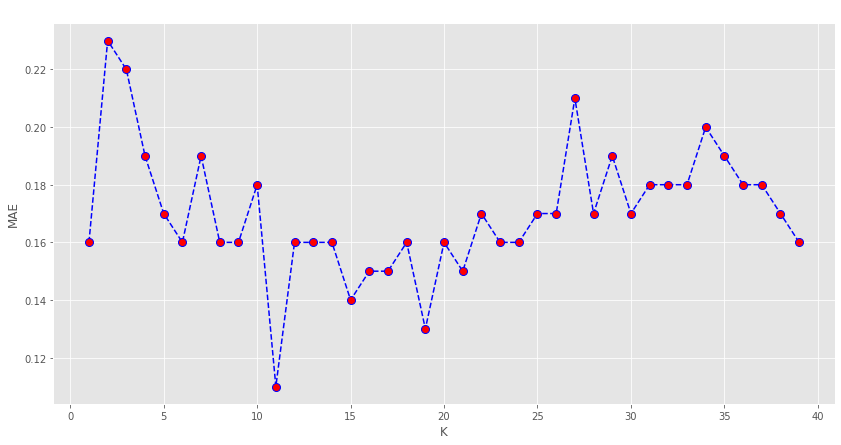

Minimum mean absolute error :  0.11  is at  11


In [6]:
## Finding the minimum error
error = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    mae = metrics.mean_absolute_error(y_test, pred_i)
    error.append(mae)

plt.figure(figsize=(14, 7))
plt.plot(range(1, 40), error, color = "blue", linestyle = "dashed", marker = "o", 
         markerfacecolor = "red", markersize = 8)
plt.title("K vs MAE")
plt.xlabel("K")
plt.ylabel("MAE")
plt.show()

print("Minimum mean absolute error : ", min(error), " is at ", error.index(min(error))+1)

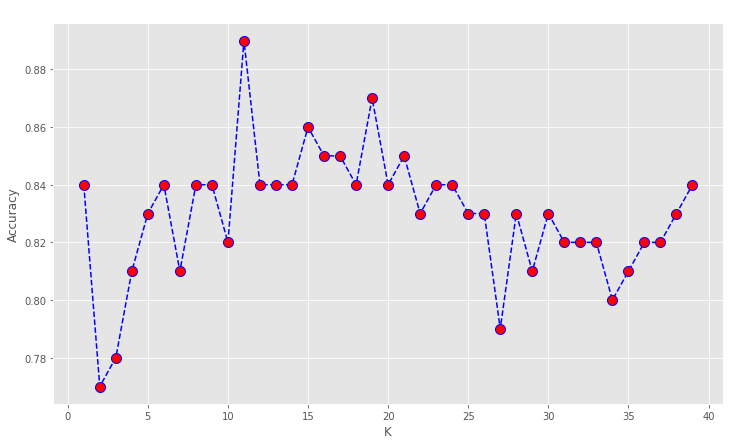

Maximum accuracy: 0.89 at K = 11


In [7]:
acc = []
# Will take some time
for i in range(1, 40):
    neigh = KNeighborsClassifier(n_neighbors=i).fit(X_train, y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))

plt.figure(figsize=(12, 7))
plt.plot(range(1, 40), acc, color='blue', linestyle='dashed',
         marker='o', markerfacecolor='red', markersize=10)
plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()

max_accuracy = max(acc)
max_k = acc.index(max_accuracy) + 1  # Add 1 because indexing starts from 0
print("Maximum accuracy:", max_accuracy, "at K =", max_k)


In [8]:
## Feature Scalling
sc = StandardScaler()
X_train =  sc.fit_transform(X_train)
X_test =  sc.fit_transform(X_test)

In [9]:
knn = KNeighborsClassifier(n_neighbors=11, metric='minkowski', p = 2)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [10]:
y_predict = knn.predict(X_test)

In [11]:
print(metrics.accuracy_score(y_test, y_predict))

0.93


In [12]:
cm = metrics.confusion_matrix(y_test, y_predict)
cm

array([[64,  4],
       [ 3, 29]], dtype=int64)

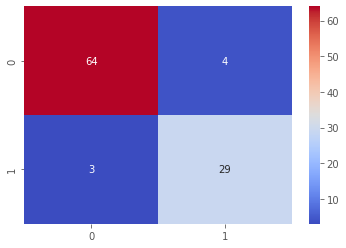

In [13]:
sb.heatmap(cm, annot=True, cmap="coolwarm")
plt.show()

In [14]:
print(metrics.classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100



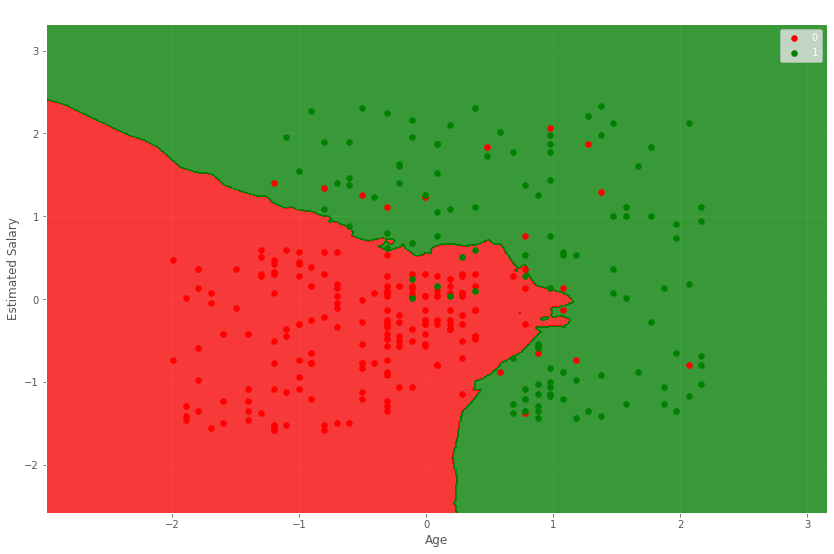

In [15]:
from matplotlib.colors import ListedColormap
plt.figure(figsize=(14, 9))
x_set, y_set = X_train, y_train

x1, x2 = np.meshgrid(np.arange(start=x_set[:, 0].min() - 1, stop=x_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=x_set[:, 1].min() - 1, stop=x_set[:, 1].max() + 1, step=0.01))

Z = knn.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape)

plt.contourf(x1, x2, Z, alpha=0.75, cmap=ListedColormap(('red', 'green')))

plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c=ListedColormap(('red', 'green'))(i), label=j)

plt.title('K-NN Algorithm (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()


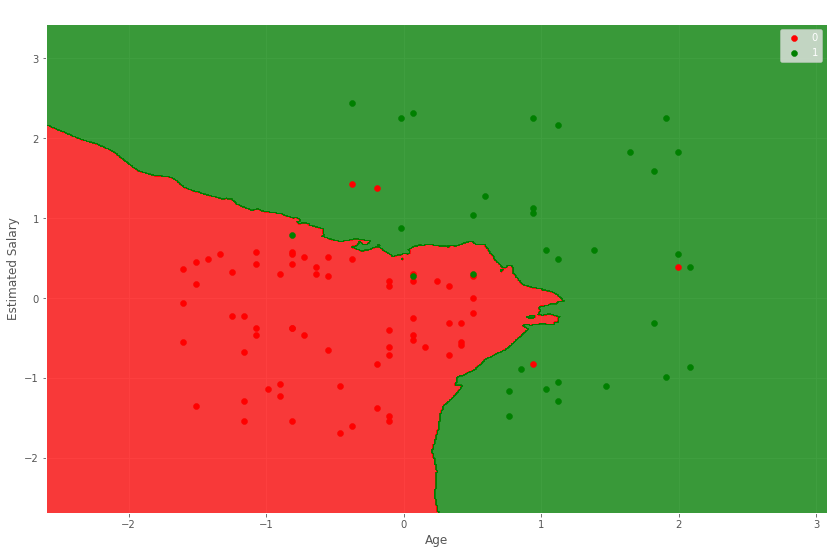

In [16]:
from matplotlib.colors import ListedColormap
plt.figure(figsize=(14, 9))
x_set, y_set = X_test, y_test

x1, x2 = np.meshgrid(np.arange(start=x_set[:, 0].min() - 1, stop=x_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=x_set[:, 1].min() - 1, stop=x_set[:, 1].max() + 1, step=0.01))

Z = knn.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape)

plt.contourf(x1, x2, Z, alpha=0.75, cmap=ListedColormap(('red', 'green')))

plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c=ListedColormap(('red', 'green'))(i), label=j)

plt.title('K-NN Algorithm (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()
